> ## Trabalho final ECM307
> ## Rafael Rubio 20.00611-0

In [92]:
import math 
import control
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from control import TransferFunction
import scipy.io.wavfile as wav
import sounddevice as sd
import IPython.display as ipd

REPETIÇÕES =15



# Requerimentos do trabalho:
1. Indicar as formantes encontradas para cada vogal.
2. Indicar a frequência fundamental de cada vogal.
3. Encontrar a função de Laplace para um trecho de uma determinada vogal    
4. Sintetizar a vogal no mesmo tempo da vogal original
5. Montar a segquência sintetizada A U A.

In [93]:


def plotar_grafico(dado_x, dado_y, titulo, labelg="None", type="", label_x='Tempo em segundos', label_y='Amplitude'):
    plt.figure()
    plt.plot(dado_x, dado_y, type, label=labelg)
    plt.title(titulo)
    plt.legend()
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    return plt

def calcular_laplace(b, c, amp):
    return TransferFunction([amp], [b, c])




## Vizualizando as vogais

<module 'matplotlib.pyplot' from 'c:\\Users\\rafae\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

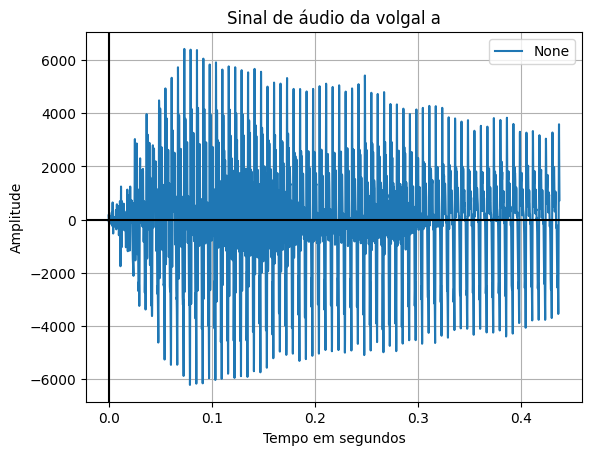

In [94]:
#Vogal A
fs_a, Vg_a = wav.read('2 - Fourier_Vogais_a.wav')
length_a = Vg_a.shape[0] / fs_a
time_a = np.linspace(0., length_a, Vg_a.shape[0])
plotar_grafico(time_a, Vg_a, 'Sinal de áudio da volgal a', label_x='Tempo em segundos', label_y='Amplitude')


In [ ]:
fs_e, Vg_e = wav.read('2 - Fourier_Vogais_e.wav')


In [95]:
Na = len(Vg_a) #numero de pontos na vogal
T1 = 1/fs_a #periodo da amostra
Ta = (Na-1)*T1 #tempo total da vogal
Pico_a = max(abs(Vg_a)) #valor maximo da vogal
temp_a = np.linspace(0, Ta, Na) #vetor de tempo da vogal

# Janelamento da vogal A
Jh_a = np.hamming(Na) #janela de hamming
Vg_ap = Vg_a*Jh_a #sinal janelado




# 2. Encontrar a frequência fundamental de cada vogal


## Vogal A

Frequência fundamental da vogal a:  [160.24709302] Hz


<module 'matplotlib.pyplot' from 'c:\\Users\\rafae\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

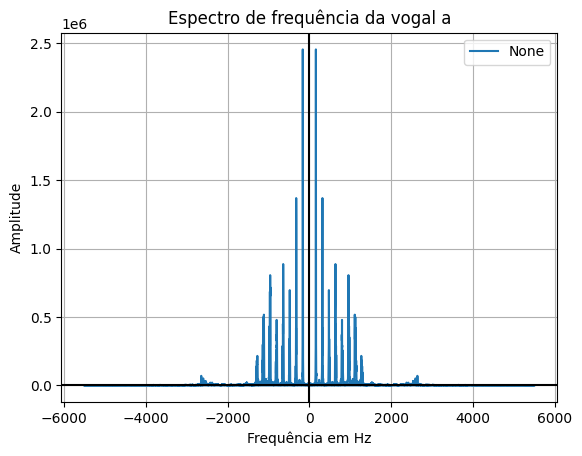

In [96]:
Fourier_a = np.fft.fft(Vg_ap) #transformada de fourier
freq_a = np.fft.fftfreq(Na, T1) #vetor de frequencia
frequencia_fund_vga = abs(freq_a[np.where(abs(Fourier_a) == max(abs(Fourier_a)))]) #frequencia fundamental da vogal a
print('Frequência fundamental da vogal a: ', frequencia_fund_vga, 'Hz')
plotar_grafico(freq_a, abs(Fourier_a), 'Espectro de frequência da vogal a', label_x='Frequência em Hz', label_y='Amplitude')

# 3. Encontrar a função de Laplace para um trecho de uma determinada vogal 